<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis
![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/0cc39c70021d21fc0d2fd7a986ccd242bef86c29/6-Figure1-1.png)

In [0]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [0]:
sentence = "i really like you but you can be so dumb some times"

## MonkeyLearn (API)

In [234]:
import requests,json

KEY = "Token 8ce6d33e0d0ee777241ce0a8eb78713f43e27fa4"
ENDPOINT = "https://api.monkeylearn.com/v3/classifiers/cl_pi3C7JiL/classify/"
r = requests.post(ENDPOINT, headers = {"Authorization":KEY,"Content-Type":"application/json"},data = json.dumps({"data": [sentence] + sentence.split()}))
result = json.loads(r.text)
result

[{'classifications': [{'confidence': 0.871,
    'tag_id': 60333049,
    'tag_name': 'Negative'}],
  'error': False,
  'external_id': None,
  'text': 'i really like you but you can be so dumb some times'},
 {'classifications': [{'confidence': 0.656,
    'tag_id': 60333050,
    'tag_name': 'Neutral'}],
  'error': False,
  'external_id': None,
  'text': 'i'},
 {'classifications': [{'confidence': 0.734,
    'tag_id': 60333050,
    'tag_name': 'Neutral'}],
  'error': False,
  'external_id': None,
  'text': 'really'},
 {'classifications': [{'confidence': 0.943,
    'tag_id': 60333048,
    'tag_name': 'Positive'}],
  'error': False,
  'external_id': None,
  'text': 'like'},
 {'classifications': [{'confidence': 0.742,
    'tag_id': 60333050,
    'tag_name': 'Neutral'}],
  'error': False,
  'external_id': None,
  'text': 'you'},
 {'classifications': [{'confidence': 0.824,
    'tag_id': 60333050,
    'tag_name': 'Neutral'}],
  'error': False,
  'external_id': None,
  'text': 'but'},
 {'classific

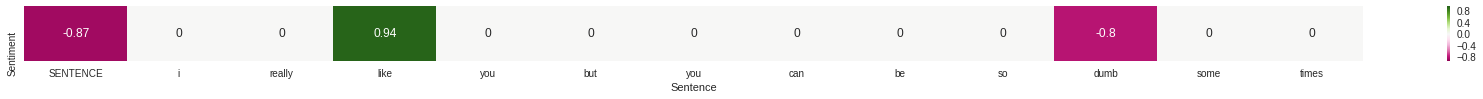

In [246]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[res["classifications"][0]["confidence"] * int(res["classifications"][0]["tag_name"] != "Neutral") * (1,-1)[res["classifications"][0]["tag_name"].startswith("Neg")] for res in result],
})

## NLTK Vader

In [12]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [162]:
sid.polarity_scores(sentence)

{'compound': -0.7154, 'neg': 0.35, 'neu': 0.537, 'pos': 0.113}

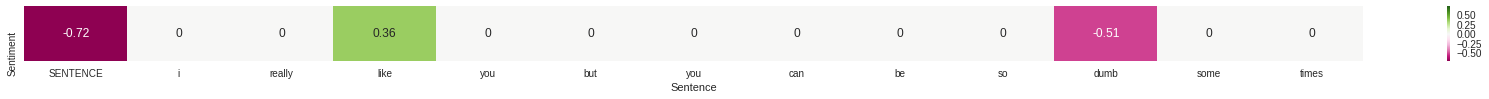

In [201]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

## TextBlob

In [0]:
from textblob import TextBlob

In [159]:
TextBlob(sentence).sentiment

Sentiment(polarity=-0.0875, subjectivity=0.35)

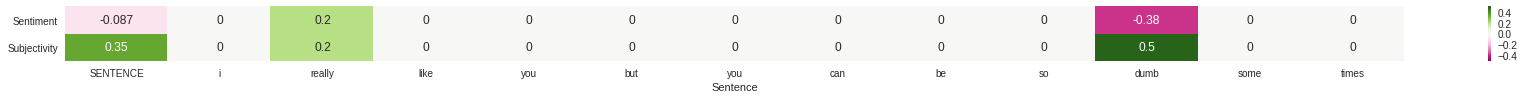

In [200]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

## Flair

In [0]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

In [183]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

[POSITIVE (0.8554061651229858)]

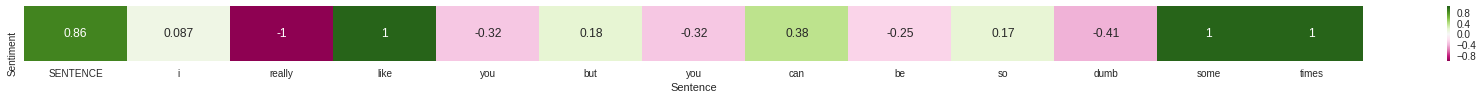

In [202]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

## DeepMoji (Emotions via Emojis)

In [0]:
!git clone https://github.com/huggingface/torchMoji

import os
os.chdir('torchMoji')

!pip3 install -e .

!python3 scripts/download_weights.py

In [32]:
!python3 examples/text_emojize.py --text f" {sentence} "

/content/torchMoji/torchmoji/model_def.py:159: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(self.embed.weight.data, a=-0.5, b=0.5)
/content/torchMoji/torchmoji/model_def.py:161: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(t)
/content/torchMoji/torchmoji/model_def.py:163: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(t)
/content/torchMoji/torchmoji/model_def.py:165: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(t, 0)
/content/torchMoji/torchmoji/model_def.py:167: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.output_layer[0].weight.data)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.w

In [59]:
import numpy as np
import torchmoji, emoji, json
from torchmoji.model_def import torchmoji_emojis
  
EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: :pensive: :ok_hand: :blush: :heart: :smirk: :grin: :notes: :flushed: :100: :sleeping: :relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: :sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: :neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: :v: :sunglasses: :rage: :thumbsup: :cry: :sleepy: :yum: :triumph: :hand: :mask: :clap: :eyes: :gun: :persevere: :smiling_imp: :sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: :wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: :angry: :no_good: :muscle: :facepunch: :purple_heart: :sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')
model = torchmoji_emojis(torchmoji.global_variables.PRETRAINED_PATH)
with open(torchmoji.global_variables.VOCAB_PATH, 'r') as f:
  vocabulary = json.load(f)

def deepmojify(sentence,top_n =5):
  def top_elements(array, k):
    ind = np.argpartition(array, -k)[-k:]
    return ind[np.argsort(array[ind])][::-1]

  st = torchmoji.sentence_tokenizer.SentenceTokenizer(vocabulary, 30)
  tokenized, _, _ = st.tokenize_sentences([sentence])
  prob = model(tokenized)[0]
  emoji_ids = top_elements(prob, top_n)
  emojis = map(lambda x: EMOJIS[x], emoji_ids)
  return emoji.emojize(f"{sentence} {' '.join(emojis)}", use_aliases=True)

/content/torchMoji/torchmoji/model_def.py:159: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(self.embed.weight.data, a=-0.5, b=0.5)
/content/torchMoji/torchmoji/model_def.py:161: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(t)
/content/torchMoji/torchmoji/model_def.py:163: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(t)
/content/torchMoji/torchmoji/model_def.py:165: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(t, 0)
/content/torchMoji/torchmoji/model_def.py:167: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.output_layer[0].weight.data)


In [60]:
deepmojify(sentence, top_n = 3)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


'i really like you but you can be so dumb some times 😕 😒 😔'